<a href="https://colab.research.google.com/github/SatyanshaDev/Resume/blob/main/GAN29_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [259]:
#STEP1: importing libraries etc

import torch
from torch import nn
import math # for using pi
import matplotlib.pyplot as plt #for graphs etc

In [260]:
#STEP 2: generating training data set 

torch.manual_seed(111)
#generates random numbers, but code 111 maps to a specific set of numbers, example next_no:= (17*current_no)%47

In [261]:
train_data_length=1024
#1024 variables
train_data=torch.zeros(train_data_length,2)
#tesnor with 1024*2 and initializing value 0 to them
print(train_data)
#printing what the tensor looks like

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]])


In [262]:
train_data[:,0]=2*math.pi*torch.rand(train_data_length)
print(train_data)
#stores random values from 0 to 2pi, since random values are given as imput, everytime different values can be generated
#meanwhile the y coordinate is kept at 0

tensor([[4.4960, 0.0000],
        [5.7428, 0.0000],
        [1.7710, 0.0000],
        ...,
        [4.4772, 0.0000],
        [3.2305, 0.0000],
        [4.0663, 0.0000]])


In [263]:
train_data[:,1]=torch.sin(train_data[:,0])
#printing the values of sinx according to the x values that we got above
print(torch.sin(train_data[:,0]))
#printing the final dataset generated which is 1024 pairs
print(train_data[:,:])

tensor([-0.9767, -0.5145,  0.9800,  ..., -0.9725, -0.0887, -0.7984])
tensor([[ 4.4960, -0.9767],
        [ 5.7428, -0.5145],
        [ 1.7710,  0.9800],
        ...,
        [ 4.4772, -0.9725],
        [ 3.2305, -0.0887],
        [ 4.0663, -0.7984]])


In [264]:
train_labels=torch.zeros(train_data_length)
print(train_labels)
#initializing a tensor that will contain the labels of data points, making the unsupervised learning - supervised to some extent

tensor([0., 0., 0.,  ..., 0., 0., 0.])


In [265]:
train_set=[
    (train_data[i],train_labels[i])for i in range(train_data_length)
]
#we have created the train set, which has train_data and train_label in each row
print(train_set)

[(tensor([ 4.4960, -0.9767]), tensor(0.)), (tensor([ 5.7428, -0.5145]), tensor(0.)), (tensor([1.7710, 0.9800]), tensor(0.)), (tensor([1.6217, 0.9987]), tensor(0.)), (tensor([ 3.9654, -0.7337]), tensor(0.)), (tensor([ 3.7702, -0.5881]), tensor(0.)), (tensor([ 5.8509, -0.4190]), tensor(0.)), (tensor([1.3527, 0.9763]), tensor(0.)), (tensor([ 3.7905, -0.6043]), tensor(0.)), (tensor([ 4.6042, -0.9942]), tensor(0.)), (tensor([1.1669, 0.9195]), tensor(0.)), (tensor([ 3.2048, -0.0632]), tensor(0.)), (tensor([ 4.7404, -0.9996]), tensor(0.)), (tensor([1.8120, 0.9710]), tensor(0.)), (tensor([ 3.6283, -0.4678]), tensor(0.)), (tensor([0.2252, 0.2233]), tensor(0.)), (tensor([0.6448, 0.6011]), tensor(0.)), (tensor([2.1483, 0.8378]), tensor(0.)), (tensor([2.7645, 0.3682]), tensor(0.)), (tensor([ 3.9842, -0.7464]), tensor(0.)), (tensor([ 3.9106, -0.6954]), tensor(0.)), (tensor([ 3.9801, -0.7436]), tensor(0.)), (tensor([ 5.3908, -0.7786]), tensor(0.)), (tensor([0.9877, 0.8348]), tensor(0.)), (tensor([ 4

Text(0, 0.5, 'sin(x)')

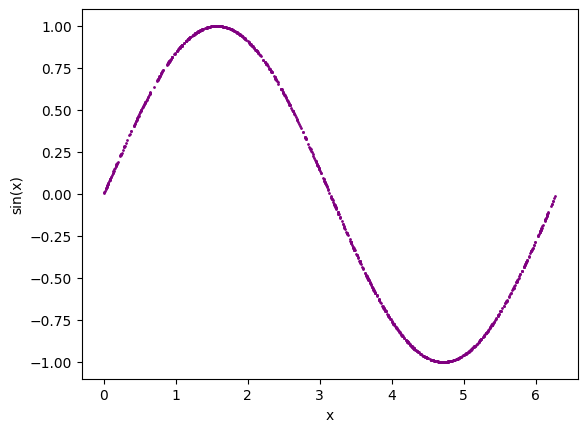

In [266]:
#plt.plot(train_data[:,0], train_data[:,1],".")
#plotting the training data
plt.scatter(train_data[:,0], train_data[:,1],s=1,color='purple')
plt.xlabel("x")
plt.ylabel("sin(x)")

In [267]:
batch_size=32
train_loader=torch.utils.data.DataLoader(
    train_set,batch_size=batch_size,shuffle=True
)
#creating a data loader: train_loader, that shuffles the data from our train_set and will return batches of 32 samples, that we will use to train the neural network

In [359]:
#STEP 3: IMPLEMENTING THE DISCRIMINATOR


#2 dimensional input(x,sinx) and 1 dimensional output telling weather its false or real
#defining the multi layer perceptron neural netwrok of discriminator which works layer by layer sequentially as defined
class Discriminator(nn.Module): #creating a discriminator clss that inherits from nn module
  def __init__(self):   #.__init__() is used to build the model
    super().__init__()  # to run __init__() from the nn module
    self.model=nn.Sequential(
        nn.Linear(2,256),
        nn.ReLU(), #input is 2 dimensional, 1st hidden layer has 256 neurons and ReLU fn as the activation fn
        nn.Dropout(0.3), #Dropout rate being 0.3 means that in every iteration, we tend to work on a smaller neural network than the previous one
                          # therefore approaches regularization and reduces overfitting
        nn.Linear(256,128),
        nn.ReLU(), #2nd hidden layer has 128 neurons and ReLU fn as the activation fn
        nn.Dropout(0.3),
        nn.Linear(128,64),
        nn.ReLU(), #3rd hidden layer has 64 neurons and ReLU fn as the activation fn
        nn.Dropout(0.3),
        nn.Linear(64,1),
        nn.Sigmoid(), #o/p layer has just one neuron with sigmoid actication fn to represent probability
    )
  def forward(self,x): #to describe how the o/p of the fn is calculated, x is i/p of model ( a 2 dimensional tensor) and o/p is obtained)
    output=self.model(x)
    return output
    lr=0.001 #sets the learning rate, used to adapt network weights
    no_epochs=300  #no of repitions of training using the whole training set
    loss_function=nn.BCELoss() #using BINARY CROSS ENTROPY fn (log loss fn measures difference btw predicted probabilities and the true labels in binary classification problems)
    optimizer_discriminator = torch.optim.Adam(self.discriminator.parameters(), lr=lr)
  

In [360]:
discriminator = Discriminator()

In [361]:
#STEP 4:IMPLEMENTING THE GENERATOR


#2 dimensional i/p and 2 dimensional o/p, i/p would have any random points and the o/p would have points resembling the training data
class Generator(nn.Module):  #creating a generator class that inherits from nn module
  def __init__(self):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(2,16), #1st hidden layer having 2 dimensional input, having 16 neurons
        nn.ReLU(),
        nn.Linear(16,32), #2nd hidden layer having 32 neurons
        nn.ReLU(),
        nn.Linear(32,2),
    ) 
  def forward(self,x):
   output=self.model(x)
   return output
   lr=0.001 #sets the learning rate, used to adapt network weights
   no_epochs=300  #no of repitions of training using the whole training set
   loss_function=nn.BCELoss() #using BINARY CROSS ENTROPY fn (log loss fn measures difference btw predicted probabilities and the true labels in binary classification problems)
   optimizer_generator = torch.optim.Adam(generator.parameters(),lr=lr)

In [362]:
generator=Generator()  #generator neural network

In [363]:
#now we are done with defining the neural network models of the discriminator and generator, next step:training
#STEP 5:setting up parameters to use in training

lr=0.001 #sets the learning rate, used to adapt network weights
no_epochs=300  #no of repitions of training using the whole training set
loss_function=nn.BCELoss() #using BINARY CROSS ENTROPY fn (log loss fn measures difference btw predicted probabilities and the true labels in binary classification problems)

In [366]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)


In [367]:
for epoch in range(no_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
 # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
    )

 # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

 # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

 # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

 # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
          print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
          print(f"Epoch: {epoch} Loss G.: {loss_generator}")


Epoch: 0 Loss D.: 0.15559588372707367
Epoch: 0 Loss G.: 3.0248804092407227
Epoch: 10 Loss D.: 0.6295998096466064
Epoch: 10 Loss G.: 0.9085065126419067
Epoch: 20 Loss D.: 0.639846920967102
Epoch: 20 Loss G.: 1.0339171886444092
Epoch: 30 Loss D.: 0.5883966088294983
Epoch: 30 Loss G.: 0.8516989350318909
Epoch: 40 Loss D.: 0.601921558380127
Epoch: 40 Loss G.: 0.784727931022644
Epoch: 50 Loss D.: 0.6919200420379639
Epoch: 50 Loss G.: 0.6931489706039429
Epoch: 60 Loss D.: 0.7915827035903931
Epoch: 60 Loss G.: 0.8088988661766052
Epoch: 70 Loss D.: 0.6333739757537842
Epoch: 70 Loss G.: 1.0402458906173706
Epoch: 80 Loss D.: 0.6396762728691101
Epoch: 80 Loss G.: 0.7952334880828857
Epoch: 90 Loss D.: 0.6328217387199402
Epoch: 90 Loss G.: 0.8669411540031433
Epoch: 100 Loss D.: 0.7050478458404541
Epoch: 100 Loss G.: 0.7230958938598633
Epoch: 110 Loss D.: 0.6703752279281616
Epoch: 110 Loss G.: 0.6958369016647339
Epoch: 120 Loss D.: 0.6940944194793701
Epoch: 120 Loss G.: 0.8310848474502563
Epoch: 130

In [368]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

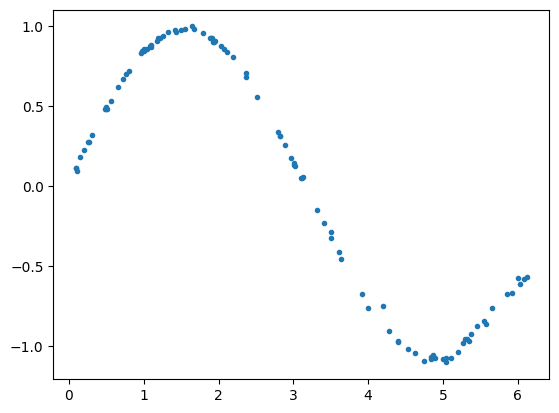

In [369]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")